Model Performance on Test Data
MAE : 0.0
RMSE: 0.0
R²  : 1.0


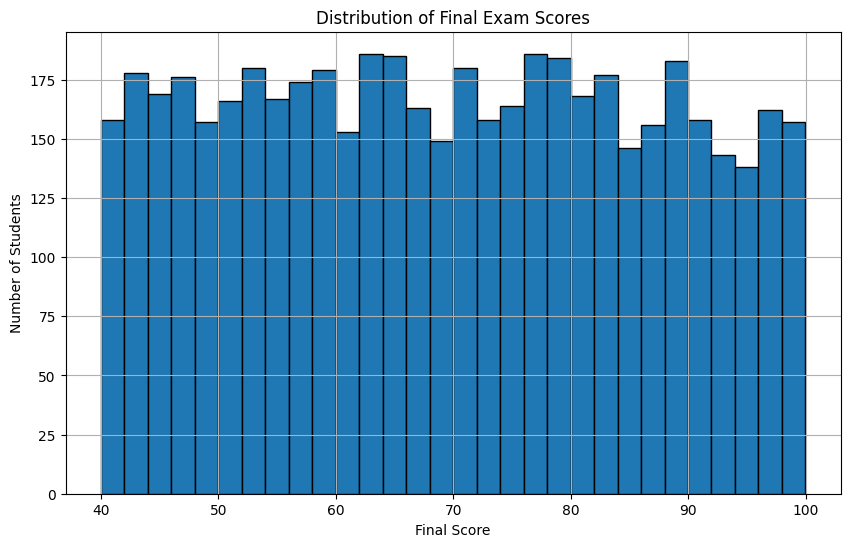

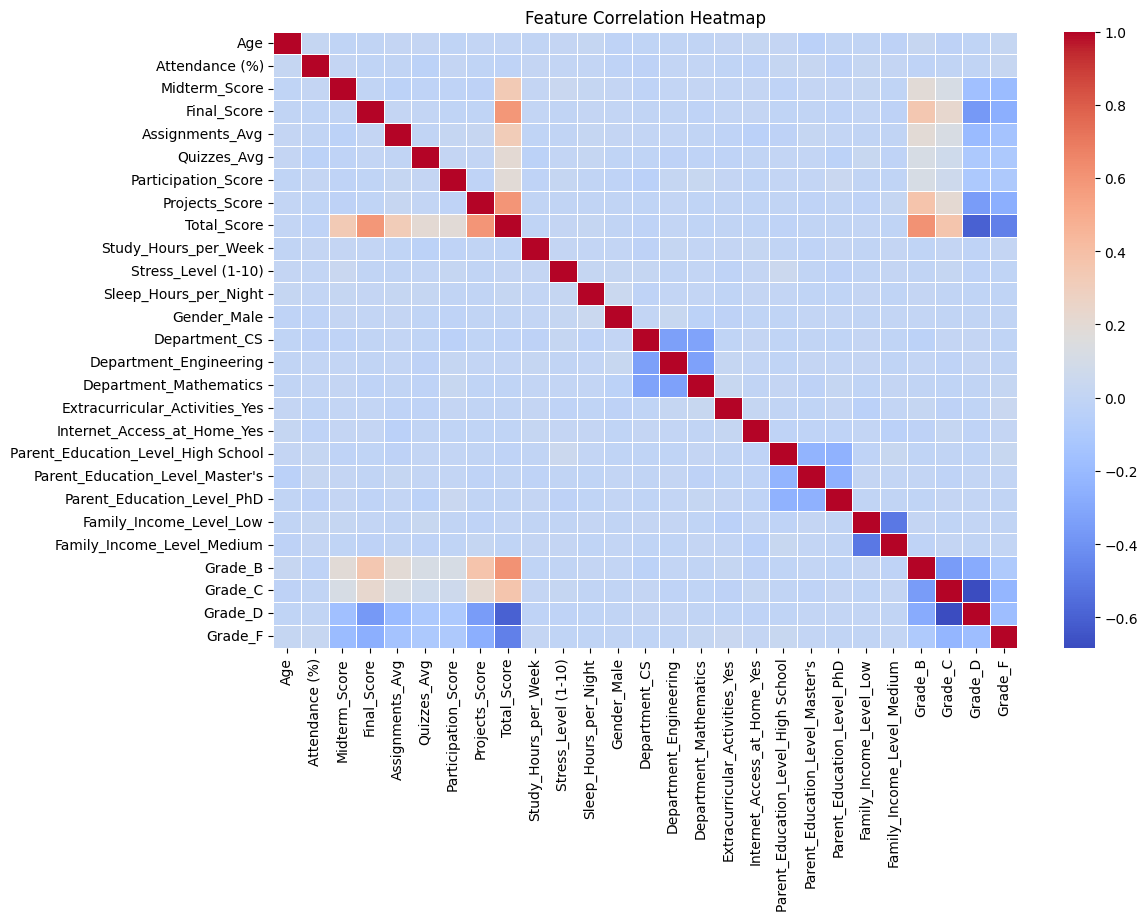

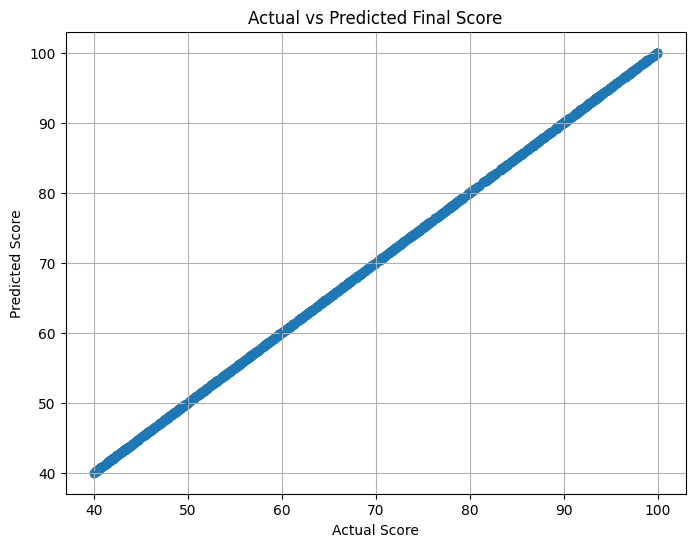

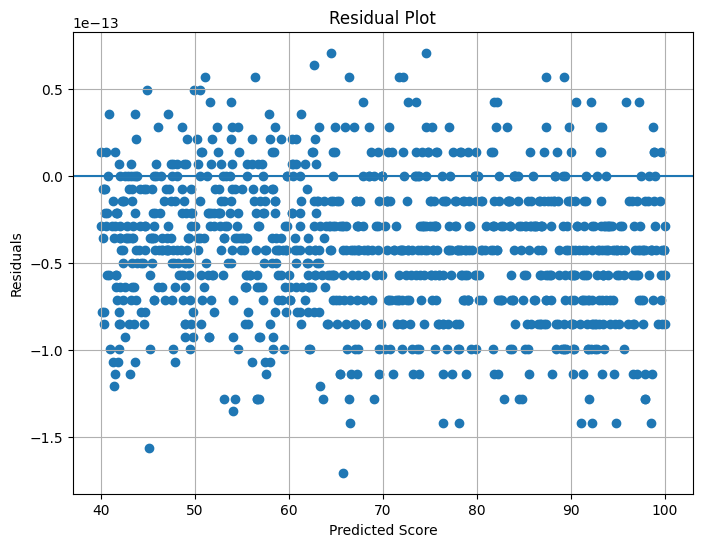


Sample Student Actual Score   : 98.53
Sample Student Predicted Score: 98.53


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



data = pd.read_csv("Students Performance Dataset.csv")
data.drop(columns=["Student_ID", "First_Name", "Last_Name", "Email"], inplace=True)
categorical_cols = [
    "Gender",
    "Department",
    "Extracurricular_Activities",
    "Internet_Access_at_Home",
    "Parent_Education_Level",
    "Family_Income_Level",
    "Grade"
]

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data.drop("Final_Score", axis=1)
y = data["Final_Score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance on Test Data")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 4))





plt.figure(figsize=(10, 6))
plt.hist(data["Final_Score"], bins=30, edgecolor="black")
plt.title("Distribution of Final Exam Scores")
plt.xlabel("Final Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()





plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()





plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Final Score")
plt.grid(True)
plt.show()




residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()




sample_student = X_test.iloc[0:1]
sample_prediction = model.predict(sample_student)

print("\nSample Student Actual Score   :", y_test.iloc[0])
print("Sample Student Predicted Score:", round(sample_prediction[0], 2))
